# Employee Burnout Prediction

Employee burnout is a state of physical, emotional, and mental exhaustion caused by excessive and prolonged stress.  
It can have serious consequences on an individual's well-being and can lead to decreased productivity and job performance.  
In today's fast-paced and constantly connected world, it is increasingly important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.

---

## Dataset: *Are Your Employees Burning Out?*

This dataset consists of **9 columns** as follows:

- **Employee ID**: The unique ID allocated for each employee (example: `fffe3300350037003500`).
- **Date of Joining**: The date when the employee joined the organization (example: `2008-09-30`).
- **Gender**: The gender of the employee (`Male` / `Female`).
- **Company Type**: The type of company the employee is working in (`Product` / `Service`).
- **WFH Setup Available**: Indicates if work-from-home facility is available (`Yes` / `No`).
- **Designation**: The designation of the employee in the organization. In the range of **[0.0, 5.0]** (higher value means higher designation).
- **Resource Allocation**: The amount of resources allocated to the employee (number of working hours). In the range of **[1.0, 10.0]** (higher means more resource).
- **Mental Fatigue Score**: The level of mental fatigue the employee is facing. In the range of **[0.0, 10.0]** where `0.0` means no fatigue and `10.0` means complete fatigue.
- **Burn Rate**: The target variable to predict. It indicates the rate of burnout while working. In the range of **[0.0, 1.0]** where higher values mean higher burnout.


## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as  pd
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pickle
import os


## Loading Dataset

In [3]:
data = pd.read_csv('/content/employee_burnout_analysis_data.csv')

## DATA Overview

In [4]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52


In [5]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,06-01-2008,Male,Product,No,3,6.0,7.8,0.61


In [6]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [7]:
data.shape

(22750, 9)

In [8]:
data.size

204750

In [9]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [10]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [12]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [13]:
data.isnull().sum().values.sum()

np.int64(4622)

## Exploratory Data Analysis

There are NaN values on our target ("Burn Rate") and also in Resource Allocation and Mental Fatigue Score columns. As we are going to perform supervised linear regression, our target variable is needed to do so. Therefore, this 1124 rows with NaN values must be dropped off of our dataframe.


In [14]:
data.corr(numeric_only=True)['Burn Rate'][:-1]


,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


These two variables are strongly correlated with target variable, therefore , important to estimate it.

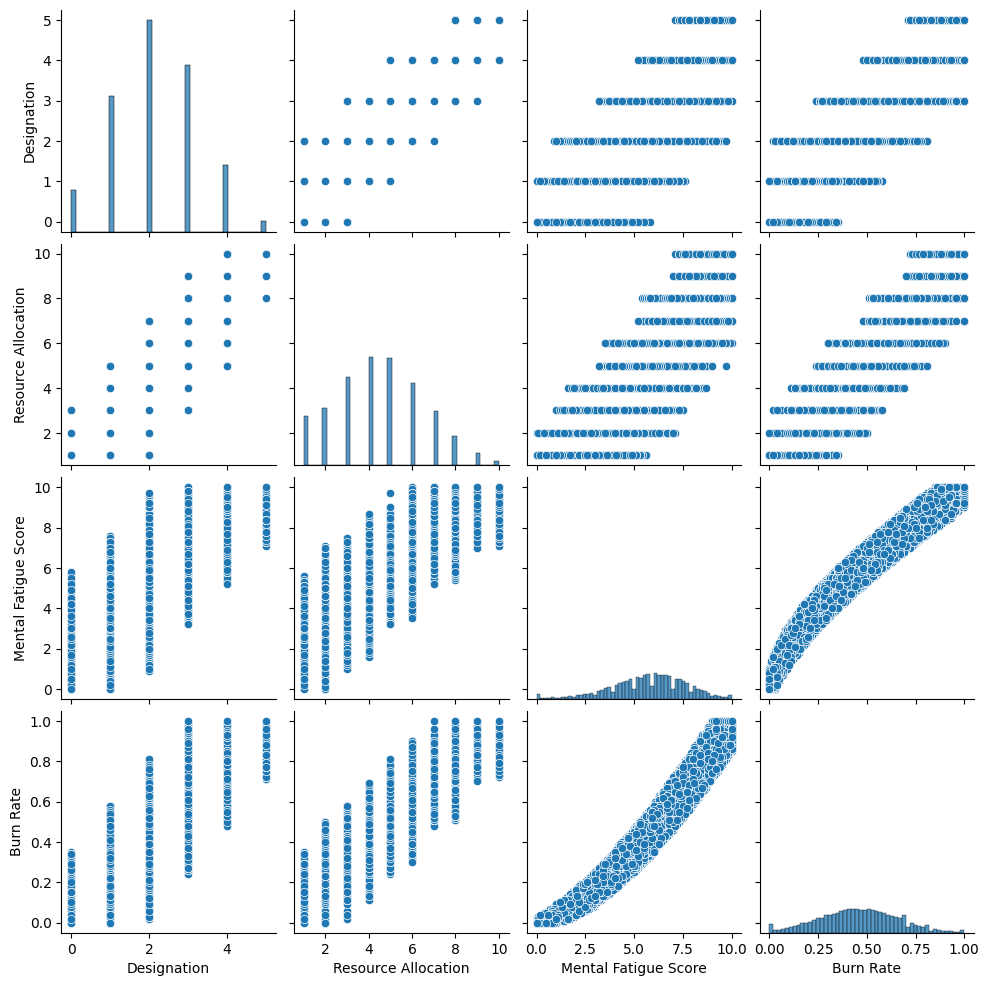

In [15]:
sns.pairplot(data)
plt.show()

Drop off all observations with NaN values of our dataframe.

In [16]:
data = data.dropna()


In [17]:
data.shape

(18590, 9)

Analyzing what type of data is each variable.

In [18]:
data.dtypes

,0
Employee ID,object
Date of Joining,object
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


 The values that each variable contains.

In [19]:
data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : data_obj[c].unique()[:10] for c in data_obj.columns})


{'Company Type': array(['Service', 'Product'], dtype=object),
 'Date of Joining': array(['30-09-2008', '30-11-2008', '03-11-2008', '24-07-2008',
       '26-11-2008', '02-01-2008', '31-10-2008', '16-03-2008',
       '12-05-2008', '14-05-2008'], dtype=object),
 'Employee ID': array(['fffe32003000360033003200', 'fffe3700360033003500',
       'fffe32003400380032003900', 'fffe31003900340031003600',
       'fffe3300350037003500', 'fffe33003300340039003100',
       'fffe32003600320037003400', 'fffe33003100330032003700',
       'fffe3400310035003800', 'fffe33003100330036003300'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'WFH Setup Available': array(['No', 'Yes'], dtype=object)}


 The employees ID doesn't provide any useful information and, therefore, they must be dropped.

In [20]:
data = data.drop('Employee ID', axis = 1)


Checking the correlation of Date of Joining with Target variable

Min date 01-01-2008
Max date 31-12-2008


<Axes: xlabel='Month', ylabel='Hired employees'>

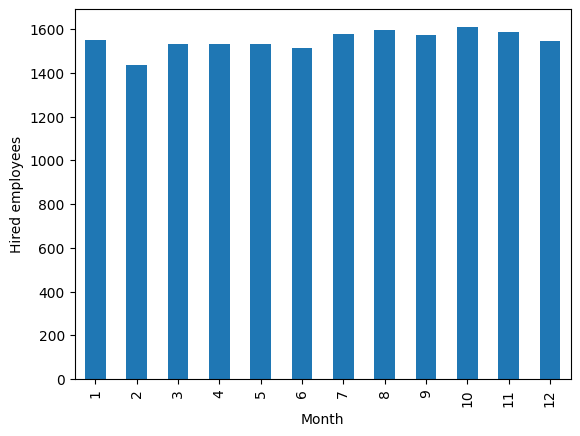

In [26]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(
    data_month['Date of Joining'].dt.month
).count().plot(kind="bar", xlabel='Month', ylabel="Hired employees")


 The date of joining is uniform distributed with values between 2008-01-01 and 2008-12-31. So in order to create a new feature which represents the labor seniority, we could create a variable with de days worked

In [27]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
3,70
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,274


In [29]:
import pandas as pd

# Ensure Date of Joining is datetime
data["Date of Joining"] = pd.to_datetime(data["Date of Joining"], errors="coerce")

# Select only numeric columns
numeric_data = data.select_dtypes(include=["number"])

# Correlation with Burn Rate
corr_with_burn = numeric_data.corr()["Burn Rate"].sort_values(ascending=False)
print(corr_with_burn)

Burn Rate               1.000000
Mental Fatigue Score    0.944389
Resource Allocation     0.855005
Designation             0.736412
Days                    0.005502
Name: Burn Rate, dtype: float64


/tmp/ipython-input-2611639804.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Date of Joining"] = pd.to_datetime(data["Date of Joining"], errors="coerce")


In [30]:
data.corr(numeric_only=True)['Burn Rate'][:]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days,0.005502


We observed that there is no strong correlation between Date of Joining and Burn Rate.So, we are dropping the column Date of Joining.

In [31]:
data = data.drop(['Date of Joining','Days'], axis = 1)

In [32]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


Now  analysing the categorical variables

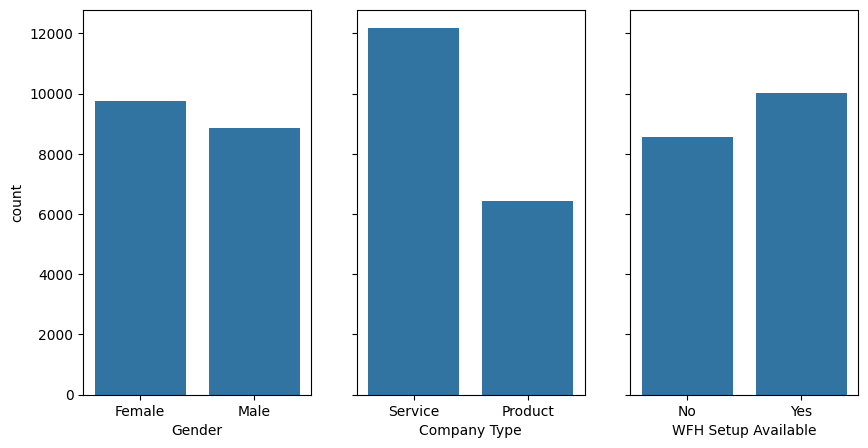

In [33]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()


The number of observations of each category on each variable is equally distributed, except to the Company_Type where the number of service jobs its almost twice that of product ones.


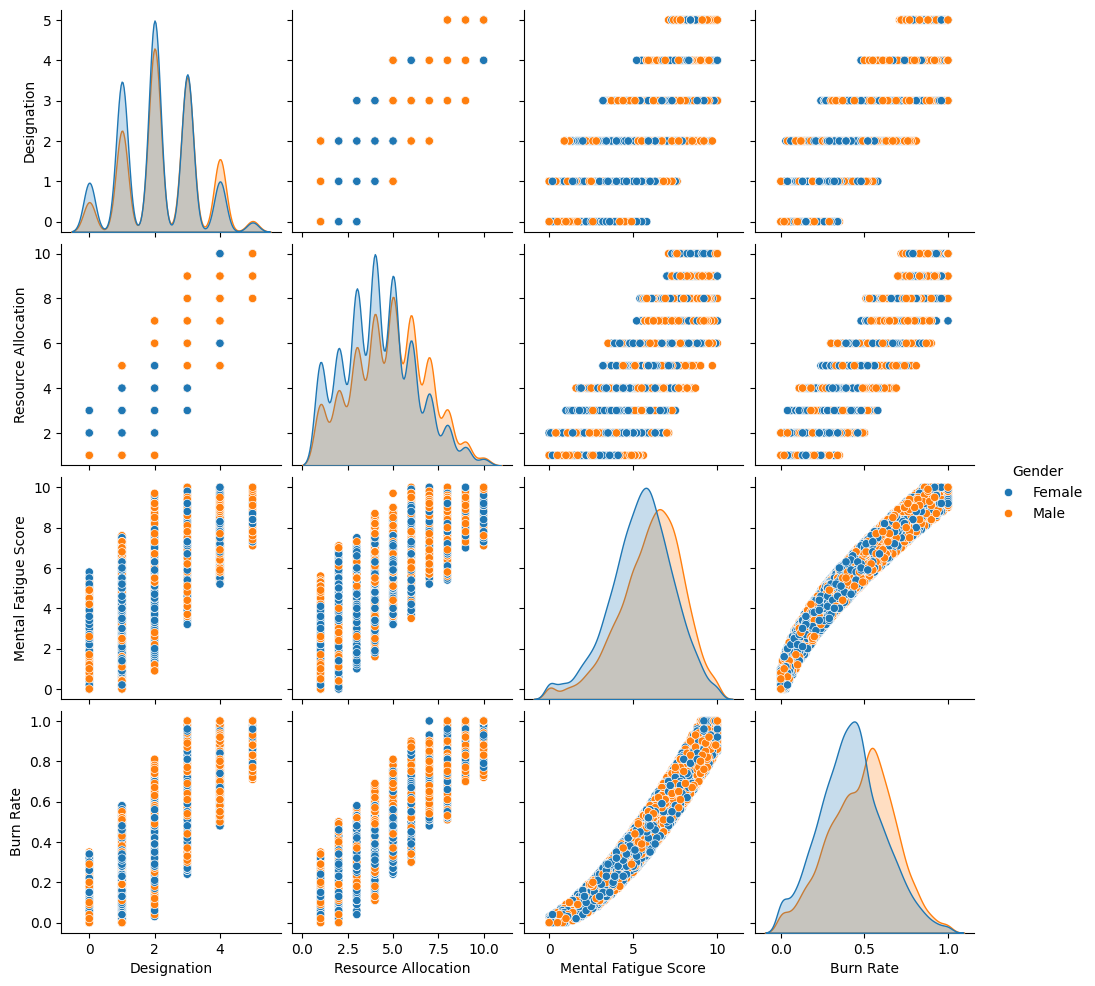

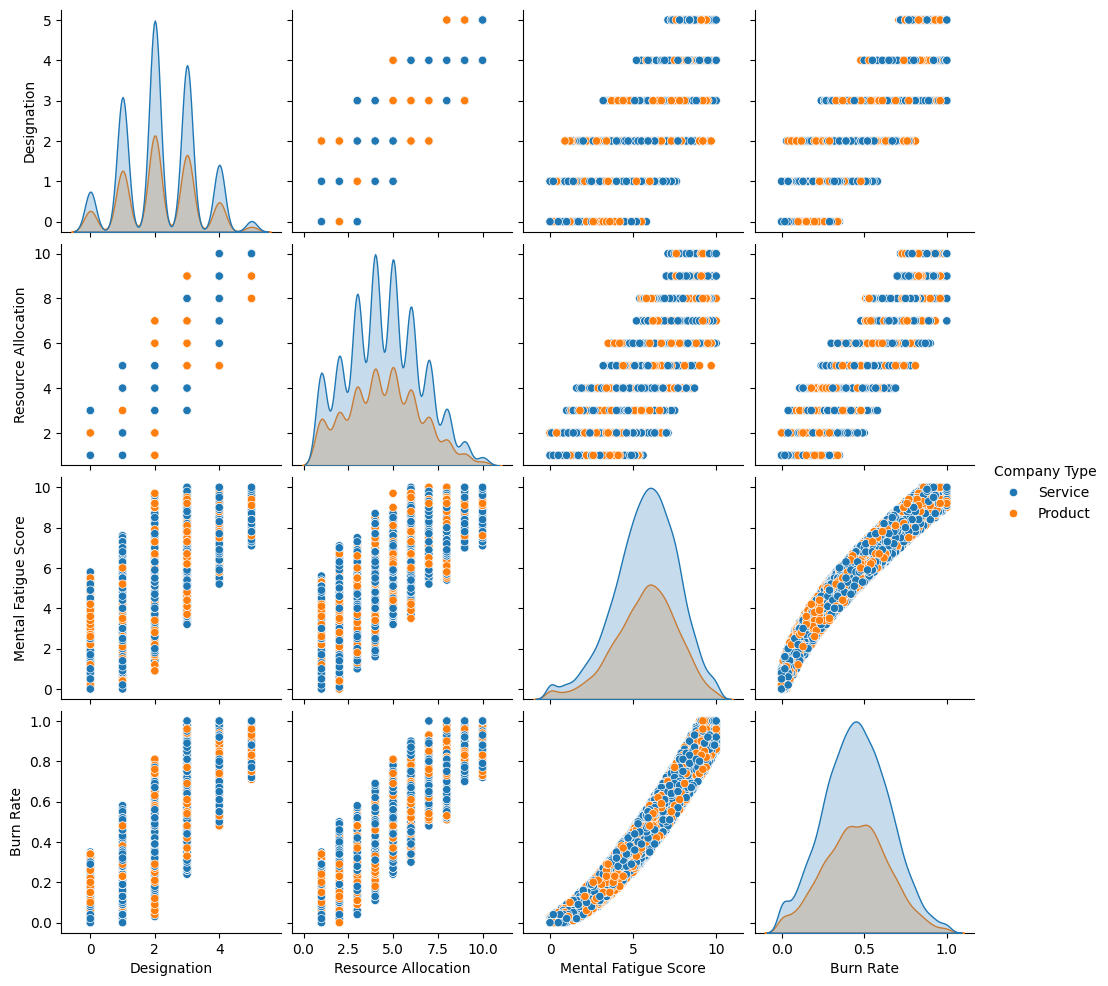

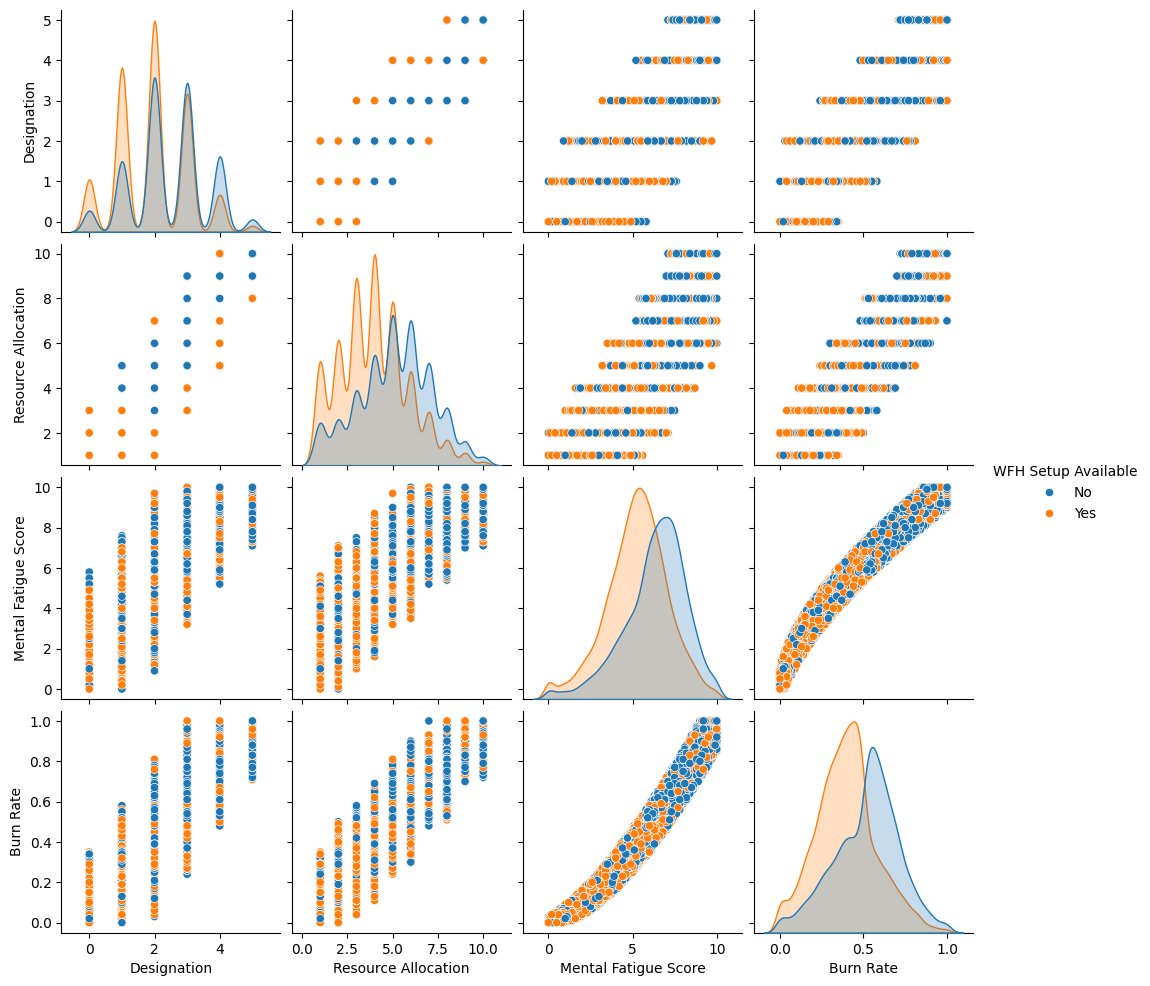

In [34]:
for c in data.select_dtypes(object).columns:
    sns.pairplot(data, hue=c)
plt.show()

In [35]:
data.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

#### One-Hot Encoding for categorical features

In [36]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available',
       'Gender'], drop_first=True)
data.head()
encoded_columns = data.columns



# Preprocessing

In [37]:
# Split df into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate', axis=1)


In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns )

In [43]:
scaler_filename = '/content/sample_data/models/scaler.pkl'

# Use pickle to save the scaler to the file
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [44]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [45]:
y_train

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


In [46]:
#saving the processed data
path = '/content/sample_data/models/untitled'

X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)


## Model Building

## Linear Regression

In [47]:
#from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [49]:
#Linear Regressing Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


In [50]:
feature_names = X.columns.tolist()
feature_names

['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Company Type_Service',
 'WFH Setup Available_Yes',
 'Gender_Male']

In [51]:
# Save the model to a file
model_filename = '/content/sample_data/models/linear_regression.pkl'
with open (model_filename ,'wb') as  model_file:
    pickle.dump(linear_regression_model, model_file)

# Support Vector Machine(Linear Kernel)

In [52]:
# Create an instance of LinearSVR and explicitly set 'dual' to 'auto' to avoid the FutureWarning
SVMLinear = LinearSVR(dual='auto', max_iter=10000)  # You can adjust 'max_iter' as needed

# Fit the model
SVMLinear.fit(X_train, y_train)


LinearSVR(max_iter=10000)

In [54]:
#Support Vector Machine (Linear Kernel) Performance Metrics
print("Support Vector Machine (Linear Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMLinear.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Support Vector Machine (Linear Kernel) Performance Metrics

Mean Squared Error: 0.003198102508375911
Root Mean Squared Error: 0.05655176839300351
Mean Absolute Error: 0.04591755564768499
R-squared Score: 0.9177652120469867


## Support Vector Machine (RBF Kernel)

In [55]:
SVMRbf = SVR()
SVMRbf.fit(X_train, y_train)

SVR()

In [57]:
#Support Vector Machine (RBF Kernel) Performance Metrics
print("Support Vector Machine (RBF Kernel) Performance Metrics\n")
# Make predictions on the test set
y_pred = SVMRbf.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Support Vector Machine (RBF Kernel) Performance Metrics

Mean Squared Error: 0.00341204574122986
Root Mean Squared Error: 0.058412719002199
Mean Absolute Error: 0.04962241383880883
R-squared Score: 0.9122639573681112


## Random Forest Reggressor

In [58]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
#RandomForestRegressor Performance Metrics
print("RandomForestRegressor Performance Metrics\n")
# Make predictions on the test set
y_pred = RandomForest.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate root mean squared error

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

RandomForestRegressor Performance Metrics

Mean Squared Error: 0.0033800517580101926
Root Mean Squared Error: 0.058138212545710354
Mean Absolute Error: 0.045908649256488444
R-squared Score: 0.913086638448205


##XGBoost

In [60]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [61]:
xgb_reg = XGBRegressor(
    n_estimators=200,     # number of boosting rounds
    learning_rate=0.1,    # step size shrinkage
    max_depth=6,          # tree depth
    random_state=42
)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [62]:
y_pred = xgb_reg.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 0.002861143174658501
Root Mean Squared Error: 0.05348965483772073
Mean Absolute Error: 0.04307733999409362
R² Score: 0.9264296558177749
